# Projet Supply Chain - DS23

## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [39]:
df_ds=pd.read_csv('reviews_trust.csv')
df_ds.head(10)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
5,"Commande passée pour une vente Lacoste , livra...",1,2021-06-19 00:00:00+00:00,Cyril CARABOT,"Bonjour Cyril , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
6,Annulation de commande après 2 mois d ’ attent...,1,2021-06-18 00:00:00+00:00,aurore regnier,"Bonjour Aurore , Je suis sincèrement désolé d'...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
7,Extrêmement déçue de la vente Apple ! ! Achat ...,1,2021-06-18 00:00:00+00:00,Paola Perez,"Bonjour Paola , Je fais suite à votre message ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
8,Extrêmement deçu pour mes achats lors la vente...,1,2021-06-18 00:00:00+00:00,Ayna,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
9,S'il y'avait une option : ne pas mettre d'étoi...,1,2021-06-18 00:00:00+00:00,linda Ng,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
url_cdis='https://fr.trustpilot.com/review/www.cdiscount.com'
page_cdis=requests.get(url_cdis)
print(page_cdis)

<Response [200]>


In [3]:
soup_cdis=bs(page_cdis.content, 'lxml')
print(soup_cdis.prettify())

<!DOCTYPE html>
<html lang="fr-FR">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="Trustpilot" name="application-name"/>
  <meta content="#1c1c1c" name="theme-color"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/1.9.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="Trustpilot" name="apple-mobile-web-app-title"/

In [8]:
entreprise = soup_cdis.find('span', class_="typography_display-s__qOjh6 typography_appearance-default__AAY17 title_displayName__TtDDM")
print("Le nom de l entreprise est : ", entreprise.text)

Le nom de l entreprise est :  Cdiscount 


In [74]:
donnees_cdiscount=soup_cdis.find_all('section', attrs = {'class' : "styles_reviewsContainer__3_GQw"})
Commentaire, star, date, client, reponse, maj, date_commande =[], [], [], [], [], [], []

   
for donnees in donnees_cdiscount : 
    
    comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
    Commentaire.append(comments)
    print(Commentaire) # renvoie uniquement le commentaire de Jean François Jurado
    # PAS OK insuffisant
    
    note_niv1=soup_cdis.find('p', class_='star-rating_starRating__4rrcf star-rating_medium__iN6Ty')
    note_niv2=note_niv1.find('img')['alt']
    star.append(note_niv2)
    print(star) # dans la soup données_cdiscount, il y a trop d'img; je fais donc un 2nd tri mais error  
    # PAS OK 
      
    """
    time=donnees.get_attribute_list('datetime')
    # print(time) renvoie [None]
    
   
    time=donnees.find('time').text.strip()
    date.append(time)
    # print(time) renvoie 'Il y a 22 minutes'

    
    if soup_cdis.find("time", class_='').has_attr('datetime'):
        time= soup_cdis.find("time")
    else: 
        time = "Non défini"
    # print(time) renvoie <time class="" data-service-review-date-time-ago="true" datetime="2023-06-25T19:10:27.000Z">Il y a 22 minutes</time>
    # comment récupérer la date dans 
    # <time datetime="2023-06-25T19:10:27.000Z" class="" data-service-review-date-time-ago="true" title="dimanche 25 juin 2023 à 21:10:27">Il y a une heure</time>
    """
    
    for time in soup_cdis.select('time'):
        date_time =time.get('datetime')
        date.append(date_time[:10])
    print(date) 
    # renvoie une liste des dates suivantes ['2023-06-25', '2023-06-24', '2023-06-24', '2023-06-25', etc]
    # OK
    
    personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
    client.append(personne)
    print(client) 
    # renvoie 'Jean François Jurado'
    # PAS OK insuffisant
    
    cde_date=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
    date_commande.append(cde_date)
    print(cde_date[21:]) # renvoie uniquement la date de commande de Jean François Jurado
    # PAS OK insuffisant
    
    

["Produits intéressants mais site un peu lent à l'affichage. C'est aussi dommage que les filtres  (cdiscount à volonté, expédition cdiscount,...) ne restent pas mémorisés qd on change de rubrique... Par contre, j'ai utilisé un bon d'achat affiché sur le site VP10CD qui signalait 10 à 20% sur plusieurs articles .... et qui au final aboutit à 1€ (sur 200€ d'achat) de façon incompréhensible => ca fait arnaque, c'est dommage....."]


AttributeError: 'NoneType' object has no attribute 'find'

### 1.2 Exploration des données

In [40]:
print(df_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
None


In [43]:
# Nettoyage du jeu de données

df_ds = df_ds.dropna(axis = 0, how = 'any', subset = ['Commentaire','date']) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


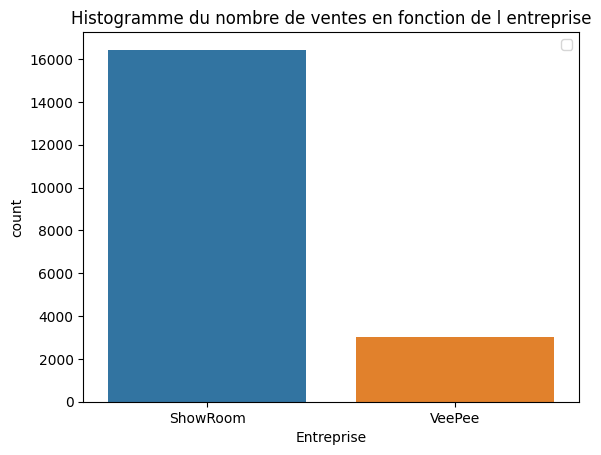

In [44]:
# Analyse de la distribution des données par entreprises

sns.countplot(x="company", data=df_ds);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

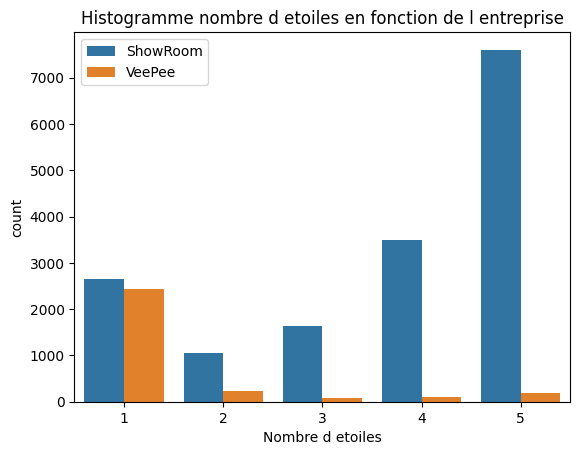

In [45]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="star", hue='company', data=df_ds)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme nombre d etoiles en fonction de l entreprise');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


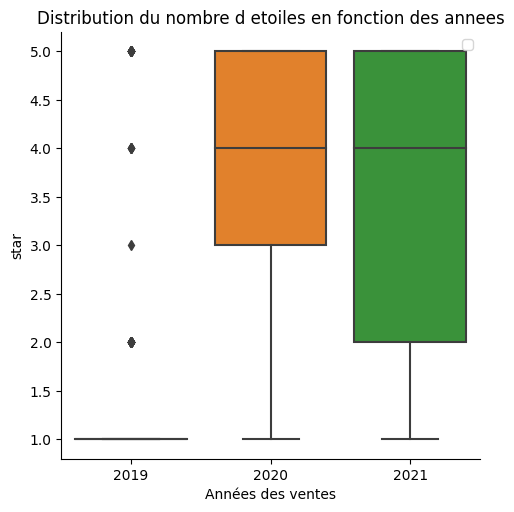

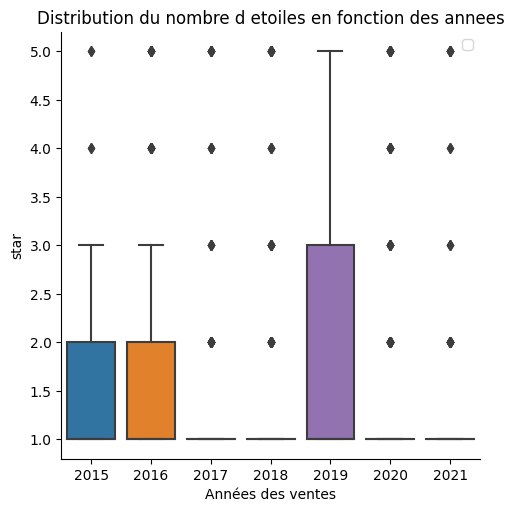

In [59]:
# Analyse de l'évolution du nombre d etoiles en fonction des années

# Création de la variable annee
df_ds["annee"] = df_ds["date"].str[:4].astype(int)

sns.catplot(data=df_ds[df_ds['company'] == 'ShowRoom'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

sns.catplot(data=df_ds[df_ds['company'] == 'VeePee'], x='annee', y='star', kind='box');
plt.xlabel('Années des ventes')
plt.legend()
plt.title('Distribution du nombre d etoiles en fonction des annees');

### 1.3 Exploitation des données